In [1]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [7]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [8]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [9]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [76]:
df.isnull().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64

In [77]:
X = df.drop(columns=['Exited'], axis=1)
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [161]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_sc= scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [162]:
len(X.columns)

11

In [163]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping

In [184]:
model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [185]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 11)                132       
                                                                 
 dense_46 (Dense)            (None, 11)                132       
                                                                 
 dense_47 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [186]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [187]:
early_Stop=EarlyStopping(monitor='loss')

In [188]:
history = model.fit(X_train_sc,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2 )

Epoch 1/100
128/128 [==============================] - 1s 2ms/step - loss: 0.5893 - accuracy: 0.7361 - val_loss: 0.5141 - val_accuracy: 0.7969
Epoch 2/100
128/128 [==============================] - 0s 1ms/step - loss: 0.5024 - accuracy: 0.7958 - val_loss: 0.4949 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4909 - accuracy: 0.7958 - val_loss: 0.4858 - val_accuracy: 0.7969
Epoch 4/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4807 - accuracy: 0.7958 - val_loss: 0.4752 - val_accuracy: 0.7969
Epoch 5/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4684 - accuracy: 0.7958 - val_loss: 0.4630 - val_accuracy: 0.7969
Epoch 6/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4555 - accuracy: 0.7958 - val_loss: 0.4515 - val_accuracy: 0.7969
Epoch 7/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4442 - accuracy: 0.7958 - val_loss: 0.4427 - val_accuracy: 0.7969

Epoch 58/100
128/128 [==============================] - 0s 1ms/step - loss: 0.3472 - accuracy: 0.8592 - val_loss: 0.3605 - val_accuracy: 0.8519
Epoch 59/100
128/128 [==============================] - 0s 1ms/step - loss: 0.3460 - accuracy: 0.8602 - val_loss: 0.3599 - val_accuracy: 0.8506
Epoch 60/100
128/128 [==============================] - 0s 1ms/step - loss: 0.3450 - accuracy: 0.8583 - val_loss: 0.3601 - val_accuracy: 0.8494
Epoch 61/100
128/128 [==============================] - 0s 1ms/step - loss: 0.3447 - accuracy: 0.8598 - val_loss: 0.3592 - val_accuracy: 0.8537
Epoch 62/100
128/128 [==============================] - 0s 1ms/step - loss: 0.3435 - accuracy: 0.8598 - val_loss: 0.3585 - val_accuracy: 0.8494
Epoch 63/100
128/128 [==============================] - 0s 1ms/step - loss: 0.3429 - accuracy: 0.8609 - val_loss: 0.3583 - val_accuracy: 0.8519
Epoch 64/100
128/128 [==============================] - 0s 1ms/step - loss: 0.3420 - accuracy: 0.8628 - val_loss: 0.3580 - val_accuracy:

In [189]:
y_pred = model.predict(X_test_sc)

63/63 [==============================] - 0s 695us/step


In [190]:
y_pred

array([[0.24846552],
       [0.24572016],
       [0.10889148],
       ...,
       [0.08312891],
       [0.17540163],
       [0.21755539]], dtype=float32)

In [191]:
y_pred= y_pred.argmax(axis=-1)

In [192]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [193]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

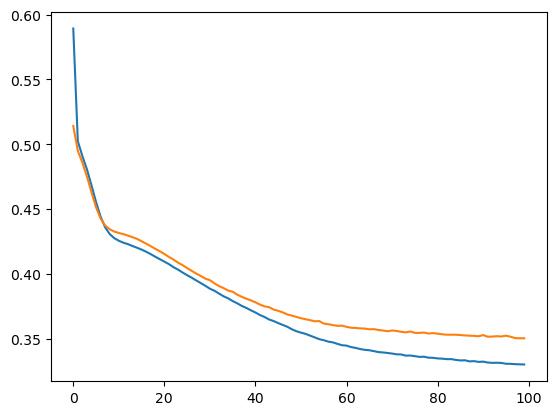

In [194]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

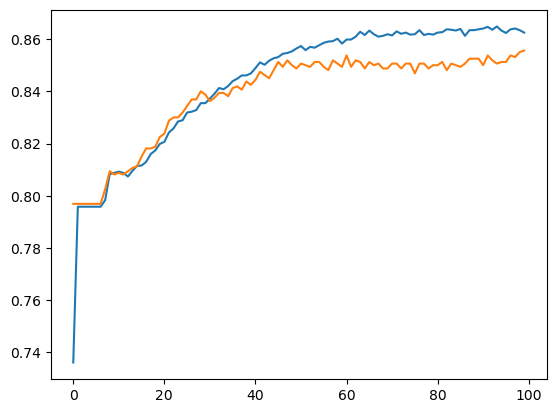

In [195]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])